In [1]:
!pip install opencv-python # OpenCV 라이브러리 설치

import cv2 # OpenCV 라이브러리 import
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


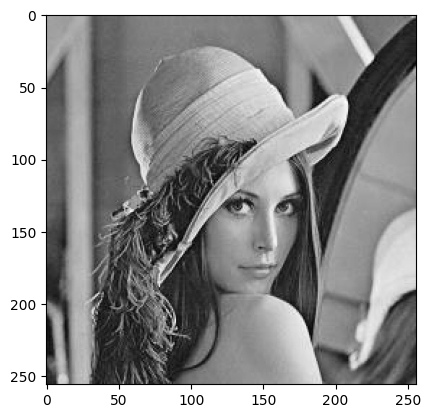

In [20]:
#img = cv2.imread('/content/gdrive/My Drive/Images/milkdrop.bmp')
img = cv2.imread('/content/gdrive/My Drive/Images/lena256.jpg') # 이미지 파일 읽기

RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 이미지를 RGB 이미지로 변환

gimg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg.shape)
plt.imshow(gimg,cmap='gray')

소벨 마스크

In [21]:
gx = np.array([[-1,0, 1],[-2,0,2],[-1,0,1]],dtype = int)
gy = np.array([[-1, -2,-1],[0,0,0],[1,2,1]],dtype = int)

In [44]:
x = cv2.filter2D(gimg,-1,gx)
y = cv2.filter2D(gimg, -1 ,gy)

In [45]:
absx = cv2.convertScaleAbs(x)
absy = cv2.convertScaleAbs(y)
outimg = cv2.addWeighted(absx,0.5,absy,0.5,0)

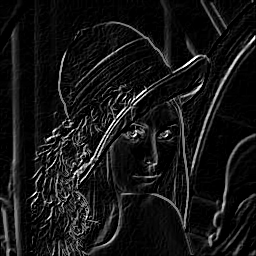

In [46]:
#outimg = outimg *10
cv2_imshow(outimg)

In [47]:
gBin = np.zeros((gimg.shape[0], gimg.shape[1]), dtype=np.ubyte)

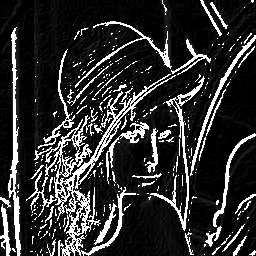

In [48]:
threshold = 40

for h in range(gimg.shape[0]):
  for w in range(gimg.shape[1]):
    if(outimg[h,w] > threshold):
      outimg[h,w] = 255  # == 연산자를 = 연산자로 변경


cv2_imshow(outimg)

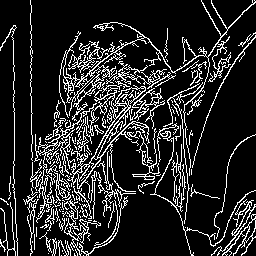

In [49]:
cannyimg = cv2.Canny(gimg,20,200)
cv2_imshow(cannyimg)

In [50]:
blurimg = cv2.GaussianBlur(gimg, (5,5),1,4)

In [55]:
x = cv2.filter2D(blurimg,-1,gx)
y = cv2.filter2D(blurimg, -1 ,gy)

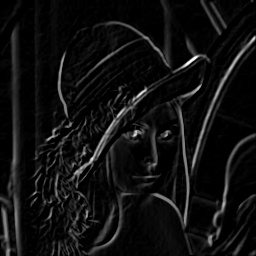

In [56]:
absx = cv2.convertScaleAbs(x)
absy = cv2.convertScaleAbs(y)
cannyOutimg = cv2.addWeighted(absx,0.5,absy,0.5,0)
cv2_imshow(cannyOutimg)

In [57]:
cannyDirection =np.arctan2(y,x)